In [1]:
#Improt

from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
#Linear Classification and Gradient Descent

australian_scale = load_svmlight_file('C:/Users/Administrator/Desktop/deep learning experients/australian_scale.svm')
print('australian data is:', australian_scale)
print(' australian data shape:', australian_scale[0].shape)

australian data is: (<690x14 sparse matrix of type '<class 'numpy.float64'>'
	with 8447 stored elements in Compressed Sparse Row format>, array([-1., -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,
        1., -1.,  1.,  1.,  1., -1.,  1., -1., -1., -1., -1., -1.,  1.,
       -1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,  1.,
        1.,  1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,  1., -1., -1.,
       -1., -1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,
        1., -1., -1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1.,
       -1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,
       -1., -1.,  1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,
       -1.,  1.,  1., -1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,
        1.,  1.,  1.,  1., -1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,
        1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,
        1., -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1.

In [4]:
#Devide dataset. and train data size is 70%,the test data size is 30%
a_train, a_test, b_train, b_test = train_test_split(australian_scale[0],australian_scale[1], train_size=0.7, test_size=0.3)
print('train data is:', a_train)
print('test data is:', a_test)

train data is:   (0, 13)	-0.96592
  (0, 12)	-0.481
  (0, 10)	1.0
  (0, 9)	-0.940299
  (0, 8)	1.0
  (0, 7)	1.0
  (0, 6)	-0.0263158
  (0, 5)	-0.25
  (0, 4)	1.0
  (0, 2)	-0.785714
  (0, 1)	0.0126315
  (0, 0)	-1.0
  (1, 13)	-0.99994
  (1, 12)	-0.826
  (1, 10)	1.0
  (1, 9)	-0.940299
  (1, 8)	1.0
  (1, 7)	-1.0
  (1, 6)	-0.973684
  (1, 5)	-0.25
  (1, 4)	-0.538462
  (1, 2)	-0.9375
  (1, 1)	-0.633985
  (1, 0)	1.0
  (2, 13)	-1.0
  :	:
  (480, 13)	-0.9
  (480, 12)	-1.0
  (480, 10)	-1.0
  (480, 9)	-0.940299
  (480, 8)	1.0
  (480, 7)	1.0
  (480, 6)	-0.649123
  (480, 5)	0.75
  (480, 4)	0.538462
  (480, 2)	-0.0357143
  (480, 1)	-0.60391
  (480, 0)	-1.0
  (481, 13)	-0.99998
  (481, 12)	-0.84
  (481, 10)	1.0
  (481, 9)	-0.761194
  (481, 8)	1.0
  (481, 7)	1.0
  (481, 6)	-0.92386
  (481, 5)	-0.25
  (481, 4)	-0.846154
  (481, 3)	-1.0
  (481, 2)	-0.785714
  (481, 1)	-0.781955
  (481, 0)	1.0
test data is:   (0, 13)	-0.88896
  (0, 12)	-1.0
  (0, 10)	-1.0
  (0, 9)	-0.940299
  (0, 8)	1.0
  (0, 7)	-1.0
  (0, 6)

In [5]:
#Initialize SVM model parameters. You can choose to set all parameter into zero, initialize it randomly or with normal distribution.
#Initialize linear model parameters.weight matrix and bias term------w and b

w = np.random.randn(a_train.shape[1])
b = np.random.randn()
print('weight matrix shape:', w.shape)

weight matrix shape: (14,)


In [6]:
#Choose loss function and derivation  
#Calculate gradient G toward loss function from all samples.
#Denote the opposite direction of gradient  G as D .
#Update model is learning rate, a hyper-parameter that we can adjust.
#Get the loss function  under the training set and  by validating under validation set.
iteration_times = 100
lamb = 0.1 
 # train loss value
train_total_loss = []  
# test loss value
test_total_loss = []    
for i in range(iteration_times):
    hinge_temp = 1 - b_train*(a_train*w + b)
    hinge_temp[hinge_temp < 0] = 0
     # hinge loss function of train data
    loss_train = np.sum(hinge_temp) + 0.5*lamb*np.linalg.norm(w)   
    
    hinge_temp = 1 - b_test*(a_test*w + b)
    hinge_temp[hinge_temp < 0] = 0
     # hinge loss function of test data
    loss_test = np.sum(hinge_temp) + 0.5*lamb*np.linalg.norm(w)   

    train_total_loss.append(loss_train)   
     # add list
    test_total_loss.append(loss_test)
            
    # update w and b
    # w_delta = alpha*y_train*x_train
    for j in range(a_train.shape[0]):
        if b_train[j]*(a_train[j]*w + b) < 1:
            w = w + (lamb*b_train[j]*a_train[j]).toarray()[0]
            b = b + lamb*b_train[j] 

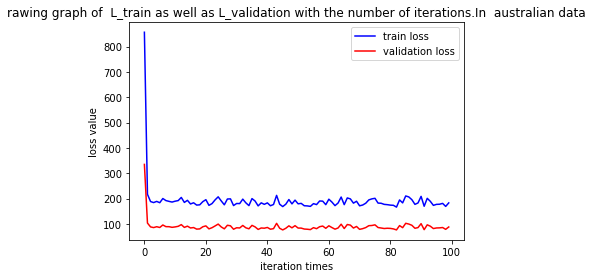

In [7]:
#drawing graph of  L_train as well as L_validation with the number of iterations.

plt.figure()
plt.title('rawing graph of  L_train as well as L_validation with the number of iterations.In  australian data')
plt.plot(range(len(train_total_loss)), train_total_loss, color='b', label='train loss')

plt.plot(range(len(test_total_loss)), test_total_loss, color='r', label='validation loss')
plt.xlabel('iteration times')
plt.ylabel('loss value')
plt.legend()
plt.show()